# OpenWeather DataFrame

In this exercise, we'll combine API calls, DataFrames, and scatter plots.

#### Import dependencies

In [1]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
from config import api_key

#### Save configuration and build query URL

In [14]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=7e98628ecd4395a6ca3f342c5abe7ccc&units=metric&q=


#### Loop through list of cities to request information for each

In [19]:
cities = ["Paris", "London", "Oslo", "Beijing", "Houston", "Chicago", "Taiwan", 
          "Seattle", "San Francisco", "Denver", "Phoenix", "Buenos Aires", "Las Vegas", "Cairo", "Lagos", "Johannesburg"]

# set up lists to hold reponse info
hum = []
temp = []
maxTemp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    weather_url = query_url + city
#     print(weather_url)
    response = requests.get(weather_url).json()
    temp.append(response['main']['temp'])
    maxTemp.append(response['main']['temp_max'])
    hum.append(response['main']['humidity'])
    
print(hum)
print(temp)

[72, 77, 88, 51, 70, 38, 74, 39, 68, 19, 16, 76, 8, 83, 92, 76]
[19.53, 14.72, 12.78, 25.6, 29.99, 22.96, 30.29, 25.07, 17.3, 25.69, 40.16, 11.5, 39.85, 27, 23.84, 11.38]


#### Create a DataFrame from cities, lat, and temp

In [20]:
weather_dict = {"City": cities, "Temperature": temp, "Max Temperature": maxTemp, "Humidity": hum}
weather_df = pd.DataFrame(weather_dict)
weather_df

,City,Temperature,Max Temperature,Humidity
0,Paris,19.53,21.11,72
1,London,14.72,17.22,77
2,Oslo,12.78,13.33,88
3,Beijing,25.60,26.67,51
4,Houston,29.99,31.11,70
5,Chicago,22.96,23.33,38
6,Taiwan,30.29,30.56,74
7,Seattle,25.07,27.22,39
8,San Francisco,17.30,21.67,68
9,Denver,25.69,27.00,19


#### Build a scatter plot for each data type

AttributeError: 'DataFrame' object has no attribute 'terrows'

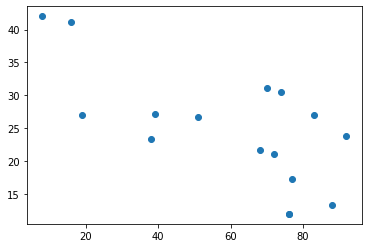

In [25]:
plt.scatter(weather_df["Humidity"], weather_df["Max Temperature"])
for index, row in weather_df.iterrows():
    plt.annotate(row['city'], (row['Humidity'], row['Max Temperature']))